# Oasis Infobyte - Data Science - 
## Batch - February Phase 1 AICTE OIB-SIP 2024


### Task 5 : Sales Prediction Using Python

In [1]:
%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Note: you may need to restart the kernel to use updated packages.


C:\Users\Gopalkrishna\AppData\Local\Temp\ipykernel_14024\3037971249.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Loading the Dataset :

In [2]:
sales_df = pd.read_csv('Advertising.csv')

In [3]:
sales_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#Dropping the unnamed column
sales_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Data Information :

In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Data Description :

In [7]:
sales_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Exploratory Data Analysis :

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


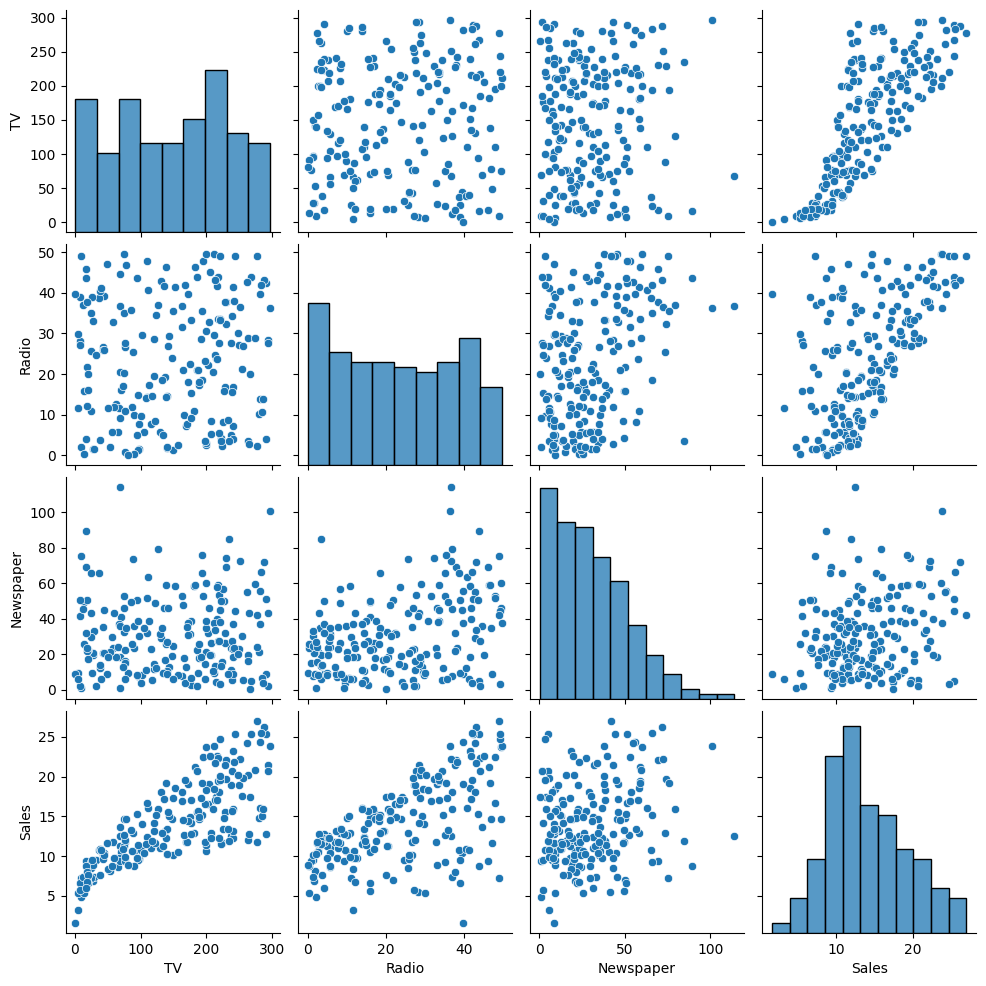

In [8]:

# Display the first few rows of the dataset to ensure it loaded correctly
print(sales_df.head())

# Create a pairplot using Seaborn
sns.pairplot(sales_df, )
plt.show()

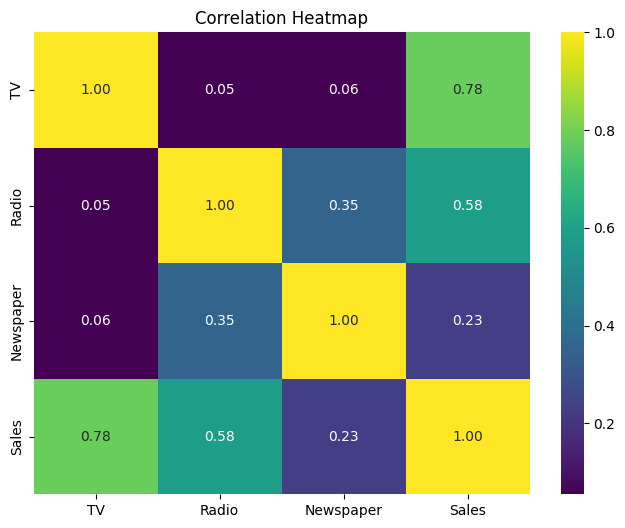

In [9]:
correlation_matrix = sales_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Train Test Split :

In [10]:
x = sales_df.drop('Sales', axis = 1)
y = sales_df['Sales']

In [11]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [12]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
#checking the shape after train-test split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


### Data Standardization :

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model Development and Evaluation :

In [16]:
#importing the metrics required for evaluation

from sklearn import metrics 

### Linear Regression :

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [18]:
#Predicting on train data
y_pred_train = lin_reg.predict(x_train)

#Predicting on test data
y_pred_test = lin_reg.predict(x_test)

**Plotting a regplot to see how our model is performing on test data**

Note: you may need to restart the kernel to use updated packages.


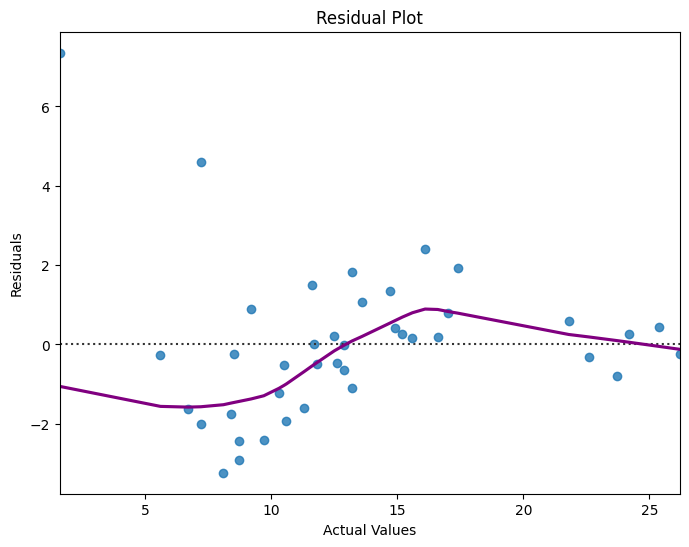

In [19]:
# Assuming y_test and y_pred_test are your actual and predicted values
%pip install statsmodels

plt.figure(figsize=(8, 6))
sns.residplot(x=y_test, y=y_pred_test, lowess=True, line_kws={'color': 'purple'})
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

**Model Evaluation :**

**Computing the MSE for our Sales predictions**

In [20]:
# Mean Squared Error
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [21]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 2.4068147558189064
MSE for test set is 4.402118291449684


**Computing the RMSE for our Sales predictions**

In [22]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [23]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 1.5513912323520802
RMSE for test set is 2.09812256349568


**Model Evaluation using R2_score :**

In [24]:
r2_train = metrics.r2_score(y_train,y_pred_train)
r2_test = metrics.r2_score(y_test,y_pred_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.9067114990146382
R2 score for test set is 0.8601145185017869


r2 score (test set) = **0.86**.